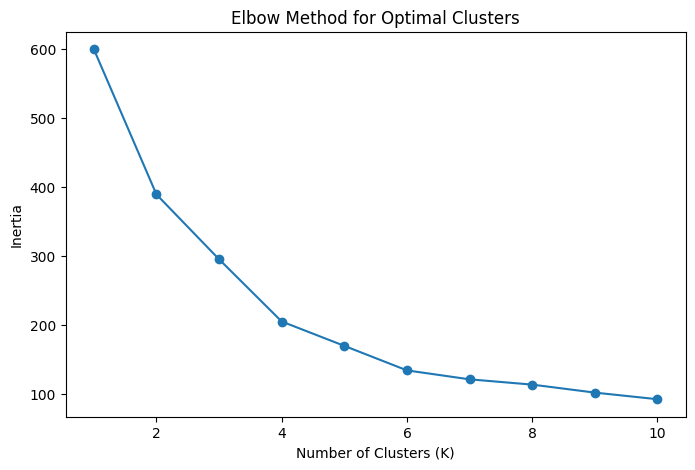

Silhouette Score: 0.41


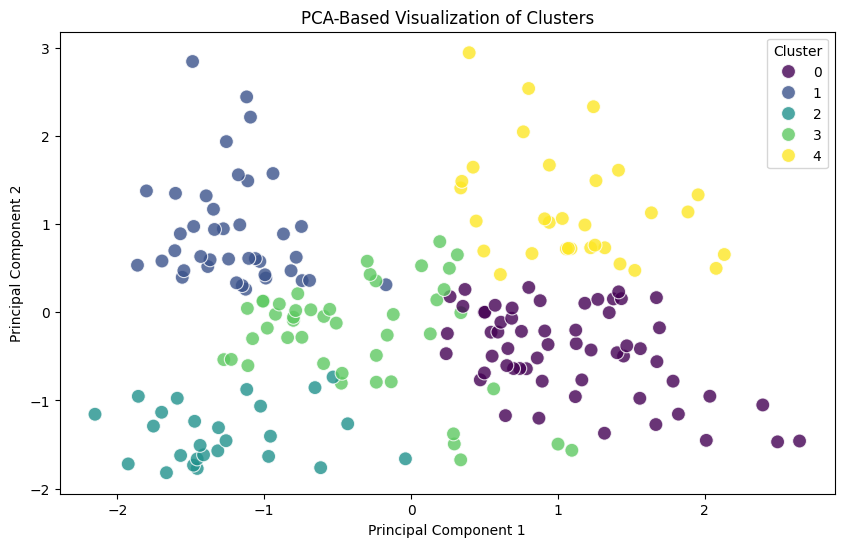


Cluster Characteristics:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        55.275862           47.620690               41.706897
1        32.875000           86.100000               81.525000
2        25.769231           26.115385               74.846154
3        26.733333           54.311111               40.911111
4        44.387097           89.774194               18.483871

Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.24      0.20        41
           1       0.28      0.29      0.28        38
           2       0.31      0.17      0.22        46
           3       0.27      0.29      0.28        42
           4       0.13      0.12      0.12        33

    accuracy                           0.23       200
   macro avg       0.23      0.22      0.22       200
weighted avg       0.24      0.23      0.22       200



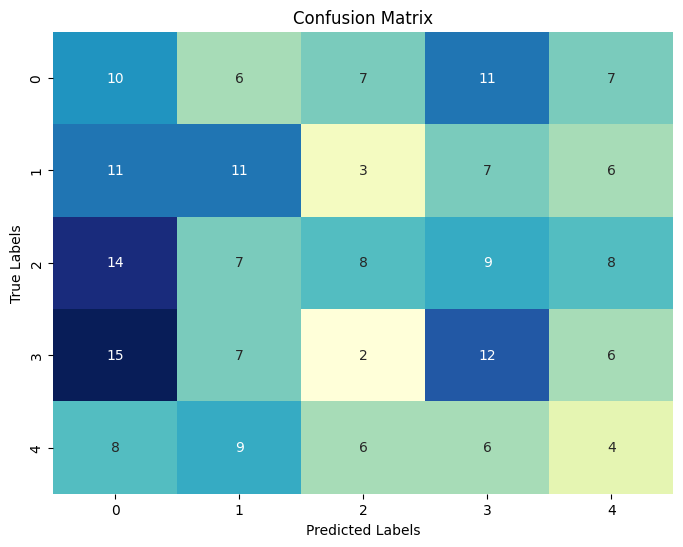

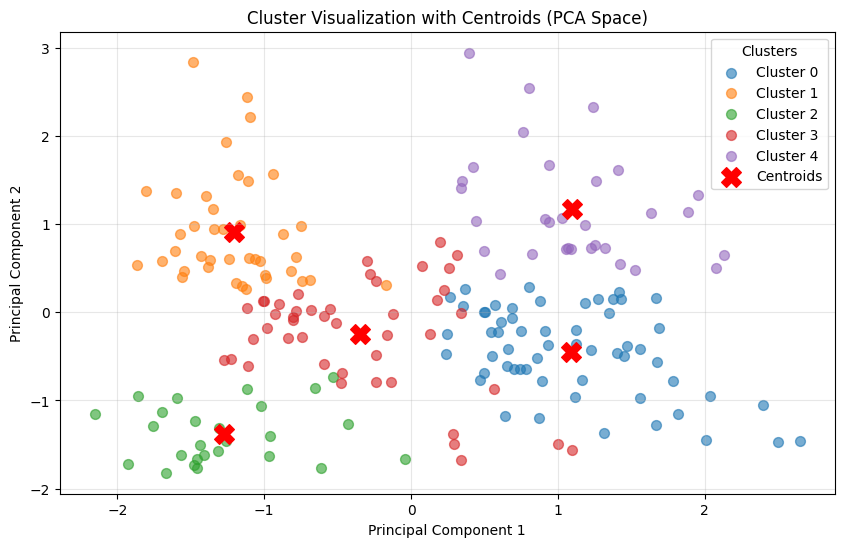

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
import itertools

# Load the dataset
data = pd.read_csv("Mall_Customers.csv")  # Adjust path if necessary

# Encode categorical 'Gender' column
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])  # Male=1, Female=0

# Select features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for better visualization (if needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Optimal clusters based on the elbow curve
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to data
data['Cluster'] = clusters

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualize clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", s=100, alpha=0.8)
plt.title("PCA-Based Visualization of Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

# Evaluate clusters with classification metrics
# Assuming clusters can serve as pseudo-labels for classification
cluster_labels = np.zeros_like(clusters)
for i in range(optimal_k):
    mask = (clusters == i)
    cluster_labels[mask] = i

# Display cluster characteristics
cluster_summary = data.groupby('Cluster')[features].mean()
print("\nCluster Characteristics:")
print(cluster_summary)

# Example classification evaluation
true_labels = np.random.choice([0, 1, 2, 3, 4], size=len(data))  # Replace with true labels if available
print("\nClassification Report:")
print(classification_report(true_labels, cluster_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, cluster_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot the data points with centroids
plt.figure(figsize=(10, 6))
for cluster_idx in range(optimal_k):
    # Filter data points belonging to the cluster
    cluster_data = X_pca[clusters == cluster_idx]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster_idx}", alpha=0.6, s=50)

# Plot the centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)  # Transform centroids into PCA space
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    color='red',
    marker='X',
    s=200,
    label='Centroids'
)

plt.title("Cluster Visualization with Centroids (PCA Space)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Clusters")
plt.grid(alpha=0.3)
plt.show()
